In [2]:
# Charge different libraries to allow data analyses
import pandas as pd            # For data manipulation
import numpy as np             # For numerical operations
import matplotlib.pyplot as plt  # For plotting (basic visualization)
import seaborn as sns          # For advanced statistical plots
import matplotlib.ticker as mtick  # For formatting axis labels
# !pip install folium # For installing folium in case import folium sends an error for a missing package. 
import folium
from folium.plugins import HeatMap
import matplotlib.ticker as mtick

In [3]:
df = pd.read_csv('home_data.csv') # Charge the dataset

print ("""We selected the home_data dataset, which is a housing price dataset describing the sale prices of homes in King County, Washington, in relation to different criteria such as the number of rooms, the year of construction, the condition, the living surface, the lot size, and the number of floors. As the file was not accompanied by a README file or metadata - that we could find - all insights must be derived directly from the exploration of the dataset itself. Consequently, we chose Task 1: Visually Exploring a Dataset, which focuses on descriptive statistics and visualization techniques to better understand the structure and patterns within the data.""")

We selected the home_data dataset, which is a housing price dataset describing the sale prices of homes in King County, Washington, in relation to different criteria such as the number of rooms, the year of construction, the condition, the living surface, the lot size, and the number of floors. As the file was not accompanied by a README file or metadata - that we could find - all insights must be derived directly from the exploration of the dataset itself. Consequently, we chose Task 1: Visually Exploring a Dataset, which focuses on descriptive statistics and visualization techniques to better understand the structure and patterns within the data.


In [4]:
# Overview of the first datas
df.head() # Display the first few rows of the dataset to understand its structure
df.info() # Show the general structure and data types of the dataset
df.isnull().sum() # Check for missing values in each column
df.head(10)  #to display the first 10 rows of the dataset

print("""The initial exploration of the dataset reveals that it contains 21 columns and 21,613 entries, each representing a single real estate transaction in King County (USA). 
The dataset provides a wide range of variables describing the physical characteristics, location, and transactional details of each property.
The 21 columns are as follows: 
- id: Unique identifier for each house sale record
- date: The date of the house sale, in format YearMonthDayTime (e.g., "20141013T000000"). 
        In order to enable time analyses, this column will have to be converted to a more comfortable format
- price: Sale price of the property in US dollars
- bedrooms: Number of bedrooms in the house
- bathrooms: Number of bathrooms, including partial bathrooms (which explains floating-point values)
- sqft_living: Interior living space of the house, measured in square feet
- sqft_lot: Total surface area of the property lot, measured in square feet
- floors: Total number of floors in the house
- waterfront: Binary indicator for the presence of a waterfront view (0 = no, 1 = yes)
- view: Rating from 0 to 4 indicating the quality of the view from the property
- condition: An index from 1 to 5 rating the overall condition of the house 
             (1 = poor, 5 = excellent)
- grade: Overall grade of the house, based on the King County grading system (ranges from 1 to 13)
- sqft_above: Surface of the house excluding the basement, measured in square feet
- sqft_basement: Size of the basement, measured in square feet
- yr_built: Year the house was originally built
- yr_renovated: Year of the most recent renovation. If the house has never been renovated, the value is 0
- zipcode: ZIP code of the property’s location
- lat: Latitude coordinate of the property
- long: Longitude coordinate of the property
- sqft_living15: Average interior living space of the 15 nearest houses (sqft). Provides neighborhood-level context
- sqft_lot15: Average lot size of the 15 nearest houses, measured in square feet.
This dataset is particularly rich because it combines transactional data (price, date), structural features (living area, number of bedrooms and bathrooms, floors, grade, condition), geographic information (latitude, longitude, ZIP code), and contextual neighborhood data (average size of nearby houses and lots).""")

print("""It enables multiple analytical approaches: 
- Exploratory analysis: understanding how price distributions vary by year of construction, size, or location
- Geospatial analysis: using latitude and longitude to identify neighborhoods with higher or lower property values
- Predictive modeling: leveraging structural and contextual variables to predict house prices""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# Cleaning and preparing the 'date' column for readability
df['date'] = df['date'].str.split('T').str[0] # Remove the time portion ("T000000") which is not relevant in our case 
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d') # Convert the cleaned column into proper datetime format
df['date'].head() # Preview the result

# Extracting year and month for more detailed time analysis 
df['year_sold'] = df['date'].dt.year # Create new columns for year of sale
df['month_sold'] = df['date'].dt.month # Create new columns for month of sale
df[['date', 'year_sold', 'month_sold']].head() # review the updated date-related columns
# df = df.drop('date', axis=1) # in case we would drop the original 'date' column if not needed anymore. 
df.head(10)  # Display the first 10 rows to confirm our changes

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
5,7237550310,2014-05-12,1225000,4,4.50,5420,101930,1.0,0,0,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014,5
6,1321400060,2014-06-27,257500,3,2.25,1715,6819,2.0,0,0,...,0,1995,0,98003,47.3097,-122.327,2238,6819,2014,6
7,2008000270,2015-01-15,291850,3,1.50,1060,9711,1.0,0,0,...,0,1963,0,98198,47.4095,-122.315,1650,9711,2015,1
8,2414600126,2015-04-15,229500,3,1.00,1780,7470,1.0,0,0,...,730,1960,0,98146,47.5123,-122.337,1780,8113,2015,4
9,3793500160,2015-03-12,323000,3,2.50,1890,6560,2.0,0,0,...,0,2003,0,98038,47.3684,-122.031,2390,7570,2015,3


In [6]:
df.describe() # Show summary statistics for numeric columns (mean, std, min, max, etc.)
print("""The dataset comprises 21,613 house sales records, and the descriptive statistics provide valuable insights into its distribution. The sale price ranges from $75,000 to $7.7 million, with a median of $450,000 and a mean of around $540,000, indicating a right-skewed distribution due to a few very expensive properties. Houses typically have 3 bedrooms (median), with values ranging from 0 up to an extreme outlier of 33. Bathrooms show similar variability, with a median of 2.25, but extreme cases include properties with up to 8 bathrooms. The living area (sqft_living) averages about 2,080 square feet, with the largest property exceeding 13,500 sqft, while the lot size varies widely (median ~7,600 sqft but maximum over 1.65 million sqft). Most houses have 1 to 2 floors, and waterfront properties are extremely rare (less than 1%). The year built spans from 1900 to 2015, with a median around 1975, while renovations are relatively uncommon (most values for yr_renovated are 0). Geographic information covers the latitude range 47.16°–47.78° and longitude range -122.52° to -121.32°, consistent with King County, Washington. Contextual neighborhood features show that nearby houses (sqft_living15, sqft_lot15) generally resemble the target properties, with median living space of about 1,840 sqft and lot size around 7,620 sqft. Finally, the data covers transactions between May 2014 and May 2015, with sales occurring across all months, peaking in the summer period.""")

The dataset comprises 21,613 house sales records, and the descriptive statistics provide valuable insights into its distribution. The sale price ranges from $75,000 to $7.7 million, with a median of $450,000 and a mean of around $540,000, indicating a right-skewed distribution due to a few very expensive properties. Houses typically have 3 bedrooms (median), with values ranging from 0 up to an extreme outlier of 33. Bathrooms show similar variability, with a median of 2.25, but extreme cases include properties with up to 8 bathrooms. The living area (sqft_living) averages about 2,080 square feet, with the largest property exceeding 13,500 sqft, while the lot size varies widely (median ~7,600 sqft but maximum over 1.65 million sqft). Most houses have 1 to 2 floors, and waterfront properties are extremely rare (less than 1%). The year built spans from 1900 to 2015, with a median around 1975, while renovations are relatively uncommon (most values for yr_renovated are 0). Geographic inform

In [7]:
# Searching for outlier and data quality checks
## Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

## Detect potential "bad data"
print("\nEntries with 0 bedrooms or 0 bathrooms:")
print(df[(df['bedrooms'] == 0) | (df['bathrooms'] == 0)].head())

print("\nMaximum number of bedrooms:", df['bedrooms'].max())
print("Maximum number of bathrooms:", df['bathrooms'].max())

## Searching for duplicate data. We want to find houses that have the same geographic coordinates (lat, long) and the same price. These may represent duplicate records of the same sale.
duplicate_mask = df.duplicated(subset=['lat', 'long', 'price'], keep=False) # Select the relevant columns ['lat', 'long', 'price'] to check for duplicates
duplicates = df[duplicate_mask].sort_values(by=['lat', 'long', 'price']) # Extract all rows flagged as duplicates
print(f"Number of potential duplicates (same lat, long, and price): {duplicates.shape[0]}") # Display the number of duplicate rows
print(duplicates.head(10)) # Preview the first few duplicate entries

## Select cases where there are more bathrooms than bedrooms
bathroom_more_than_bedroom = df[df['bathrooms'] > df['bedrooms']]
print(f"Number of houses with more bathrooms than bedrooms: {bathroom_more_than_bedroom.shape[0]}") # total number of cases
print(bathroom_more_than_bedroom[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'yr_built']].head(10)) # listing of the cases

## Filter only housing with >= 1 bathroom more than bedrooms
df_bathroom_more = df[df['bathrooms'] >= df['bedrooms'] + 1]
print(f"Number of houses with >= 1 bathroom more than bedrooms: {df_bathroom_more.shape[0]}") # total number of cases
print(df_bathroom_more[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'yr_built']].head(10)) # listing of the cases

## Outlier detection using IQR for price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_price = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"\nNumber of price outliers detected: {len(outliers_price)}")

Missing values per column:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year_sold        0
month_sold       0
dtype: int64

Entries with 0 bedrooms or 0 bathrooms:
              id       date    price  bedrooms  bathrooms  sqft_living  \
875   6306400140 2014-06-12  1095000         0        0.0         3064   
1149  3421079032 2015-02-17    75000         1        0.0          670   
3119  3918400017 2015-02-05   380000         0        0.0         1470   
3467  1453602309 2014-08-05   288000         0        1.5         1430   
4868  6896300380 2014-10-02   228000         0        1.0          390   

      sqft_lot  floors  waterfront  v

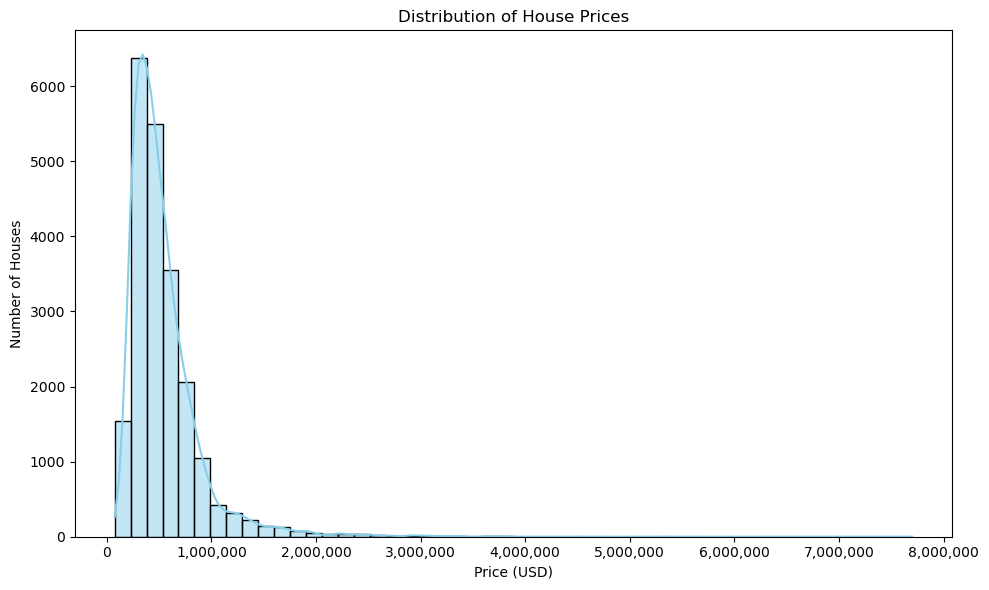

The histogram of house prices in King County (2014–2015 sales) reveals a strongly right-skewed distribution. Most transactions fall within the range of 200,000 to 600,000 USD, with a pronounced peak around 450,000 USD, which represents the median value reported in the dataset. The kernel density curve confirms this central tendency while also highlighting the presence of a long tail of high-value transactions. Although the majority of houses were sold within the lower-to-middle price range, a small proportion of properties exceed 2 million USD, with extreme outliers reaching up to 7.7 million USD. These exceptional cases likely represent luxury homes or waterfront estates and contribute to pulling the mean price above the median. Overall, the distribution illustrates the heterogeneity of the housing market, where typical residential properties dominate sales but a minority of very expensive transactions significantly affect the overall price structure.


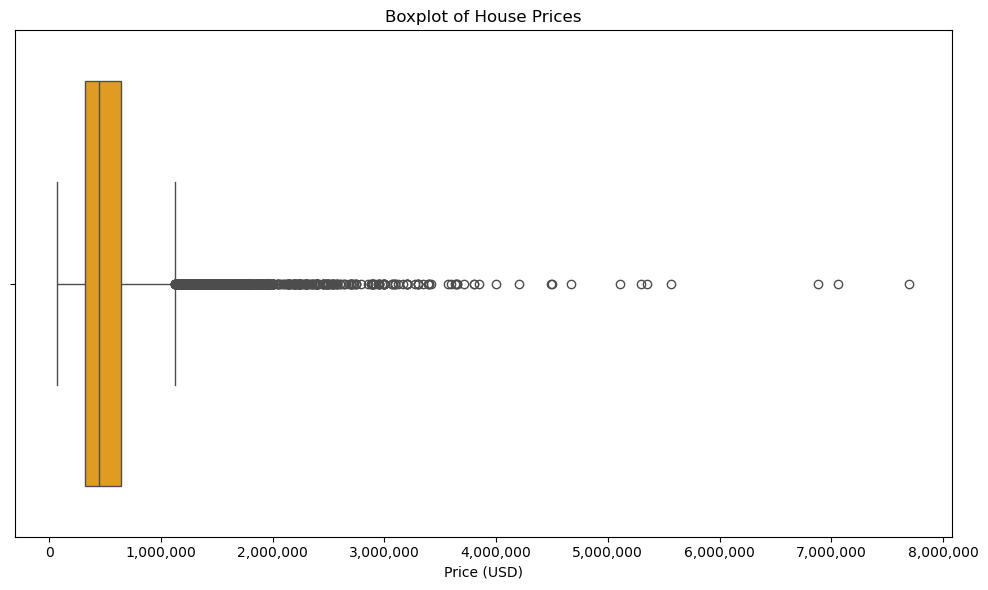

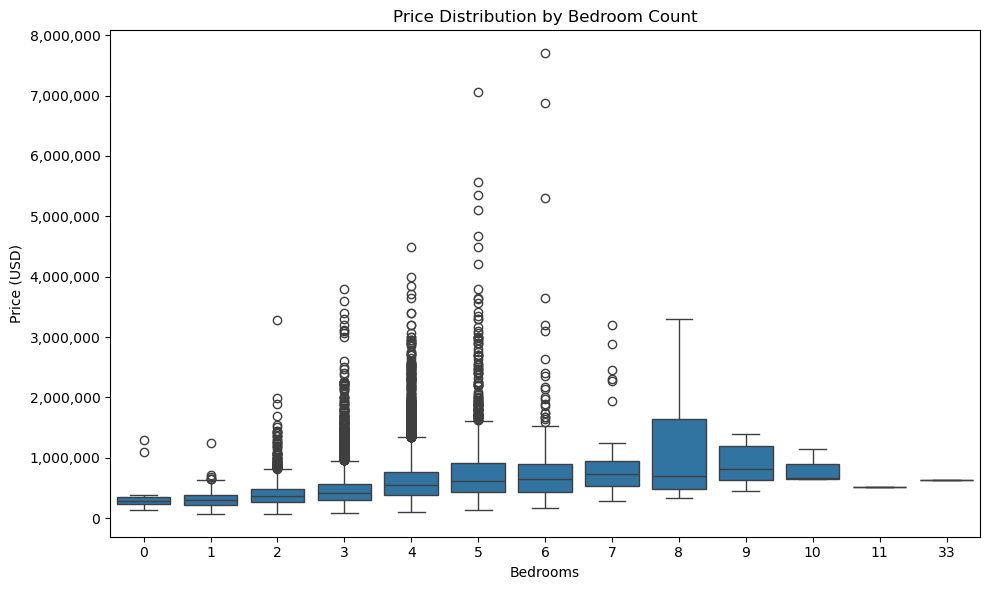

The boxplot of house prices by bedroom count in King County (2014–2015 sales) reveals a general tendency for prices to increase with the number of bedrooms, though the relationship is not strictly linear. Houses with 3 to 5 bedrooms dominate the dataset and show relatively consistent median prices, while properties with very high bedroom counts (above 8) display substantial variability and numerous extreme outliers. The spread of prices also widens as the number of bedrooms increases, reflecting the influence of additional factors such as location, lot size, or luxury features. Interestingly, some houses with exceptionally high prices are found even among properties with relatively few bedrooms, suggesting that bedroom count alone is not a sufficient predictor of market value. This highlights the heterogeneity of the housing market, where price depends on a combination of structural, locational, and contextual characteristics beyond just bedroom count.


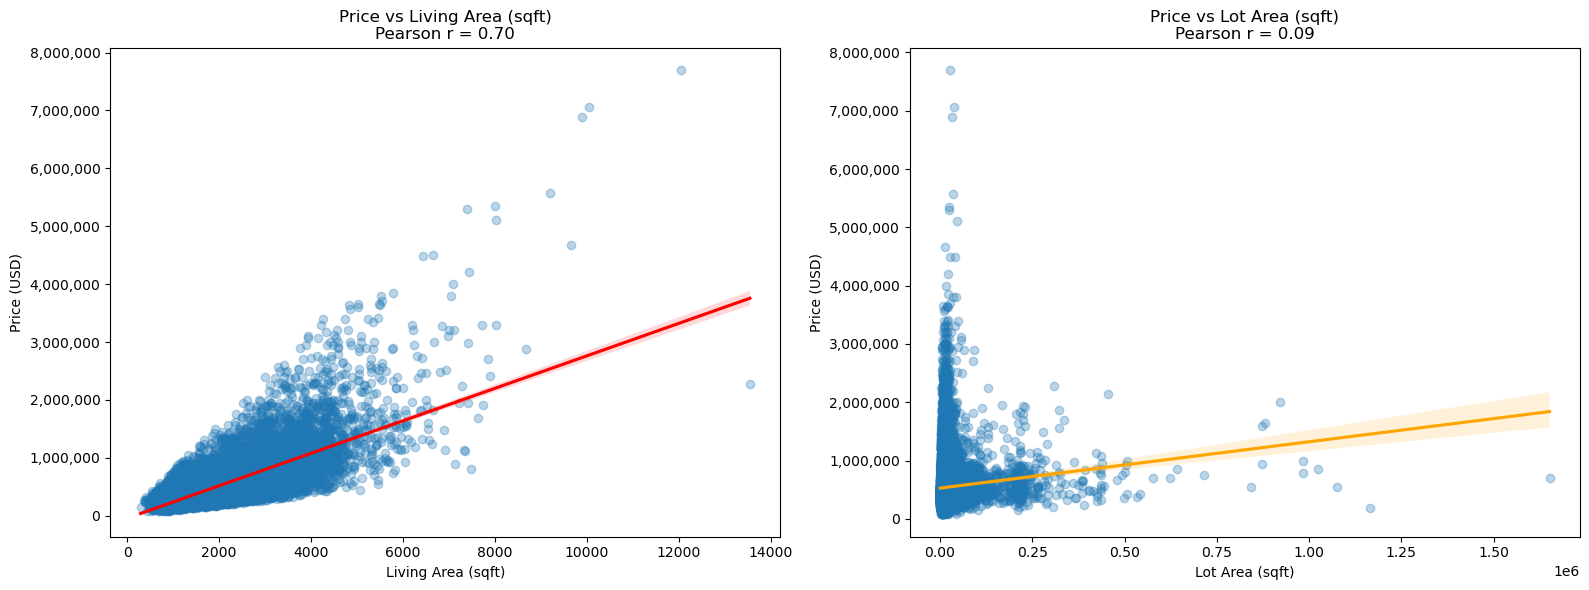

The two scatterplots of prices against living/lot area (sqft) provide complementary insights into how property size relates to housing prices in King County between 2014 and 2015. In the first panel (living area), we observe a strong positive association between interior space and price. The regression line, with a Pearson correlation of approximately r ≈ 0.70, indicates that larger houses tend to command higher prices, particularly within the 1,000–4,000 sqft range where most transactions occur. The dispersion around the trend line increases for larger properties, suggesting that while living space is a key driver of value, other factors such as neighborhood, amenities, and architectural quality also play important roles. Outliers are visible in the form of highly priced houses with relatively modest square footage, likely reflecting luxury properties in premium locations. By contrast, the second panel (lot size) shows a much weaker association with price (correlation near zero). Alth

In [8]:
# Evaluation of the prices
## Plot price distribution with KDE
plt.figure(figsize=(10,6))
sns.histplot(df['price'],
             bins=50,
             kde=True,
             color='skyblue')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format y-axis with commas for thousands
plt.title("Distribution of House Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Number of Houses")
plt.tight_layout()
#plt.savefig("house_price_distribution.png", dpi=300, bbox_inches='tight') # Save the figure
plt.show() # Show the plot
print("""The histogram of house prices in King County (2014–2015 sales) reveals a strongly right-skewed distribution. Most transactions fall within the range of 200,000 to 600,000 USD, with a pronounced peak around 450,000 USD, which represents the median value reported in the dataset. The kernel density curve confirms this central tendency while also highlighting the presence of a long tail of high-value transactions. Although the majority of houses were sold within the lower-to-middle price range, a small proportion of properties exceed 2 million USD, with extreme outliers reaching up to 7.7 million USD. These exceptional cases likely represent luxury homes or waterfront estates and contribute to pulling the mean price above the median. Overall, the distribution illustrates the heterogeneity of the housing market, where typical residential properties dominate sales but a minority of very expensive transactions significantly affect the overall price structure.""")

## Boxplot of prices (visual outlier detection)
plt.figure(figsize=(10,6))
sns.boxplot(x=df['price'],
            color='orange')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format y-axis with commas for thousands
plt.title("Boxplot of House Prices")
plt.xlabel("Price (USD)")
plt.tight_layout()
#plt.savefig("house_price_boxplot.png", dpi=300, bbox_inches='tight') # Save the figure
plt.show() # Show the plot

# Boxplot shows distribution of price for each bedroom count
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, 
           x='bedrooms',
            y='price')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format y-axis with commas for thousands

plt.title("Price Distribution by Bedroom Count")
plt.xlabel("Bedrooms")
plt.ylabel("Price (USD)")
plt.tight_layout()
plt.show() # Show the plot
print("""The boxplot of house prices by bedroom count in King County (2014–2015 sales) reveals a general tendency for prices to increase with the number of bedrooms, though the relationship is not strictly linear. Houses with 3 to 5 bedrooms dominate the dataset and show relatively consistent median prices, while properties with very high bedroom counts (above 8) display substantial variability and numerous extreme outliers. The spread of prices also widens as the number of bedrooms increases, reflecting the influence of additional factors such as location, lot size, or luxury features. Interestingly, some houses with exceptionally high prices are found even among properties with relatively few bedrooms, suggesting that bedroom count alone is not a sufficient predictor of market value. This highlights the heterogeneity of the housing market, where price depends on a combination of structural, locational, and contextual characteristics beyond just bedroom count.""")

## Graphs shows distribution of price per sqm
corr_living = df['price'].corr(df['sqft_living']) # Calculate the correlation value of the living area 
corr_lot = df['price'].corr(df['sqft_lot']) # Calculate the correlation value of the lot area 
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Create a figure with two subplots side by side
sns.regplot(data=df,
    x='sqft_living',
    y='price',
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'},
    ax=axes[0]) # Plot 1: Price vs living area with regression line
axes[0].yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # format prices with commas
axes[0].set_title(f"Price vs Living Area (sqft)\nPearson r = {corr_living:.2f}")
axes[0].set_xlabel("Living Area (sqft)")
axes[0].set_ylabel("Price (USD)")

sns.regplot(data=df,
    x='sqft_lot',
    y='price',
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'orange'},
    ax=axes[1]) # Plot 2: Price vs lot area with regression line
axes[1].yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # Format y-axis with commas for thousands
axes[1].set_title(f"Price vs Lot Area (sqft)\nPearson r = {corr_lot:.2f}")
axes[1].set_xlabel("Lot Area (sqft)")
axes[1].set_ylabel("Price (USD)")
plt.tight_layout()
plt.show() # Show the plot
print("""The two scatterplots of prices against living/lot area (sqft) provide complementary insights into how property size relates to housing prices in King County between 2014 and 2015. In the first panel (living area), we observe a strong positive association between interior space and price. The regression line, with a Pearson correlation of approximately r ≈ 0.70, indicates that larger houses tend to command higher prices, particularly within the 1,000–4,000 sqft range where most transactions occur. The dispersion around the trend line increases for larger properties, suggesting that while living space is a key driver of value, other factors such as neighborhood, amenities, and architectural quality also play important roles. Outliers are visible in the form of highly priced houses with relatively modest square footage, likely reflecting luxury properties in premium locations. By contrast, the second panel (lot size) shows a much weaker association with price (correlation near zero). Although some large lots are associated with high property values, the majority of transactions cluster around standard suburban parcel sizes (5,000–10,000 sqft), and the regression line is nearly flat. This suggests that, unlike living area, lot size alone is not a consistent determinant of sale price in King County during this period. The weak relationship may reflect zoning practices or the fact that many buyers prioritize interior living space over land area when valuing properties. Taken together, these results highlight that living area is a far stronger predictor of housing price than lot size in this dataset. This distinction underscores the importance of carefully selecting structural attributes in predictive modeling, as not all size-related variables exert comparable influence on property values.""")

All houses in this dataset have a surface area between 290 m² and 13540 m² and are on average 2079.8997362698374 m². Furthermore, the houses have a ground coveraage contained between 520 m² and 1651359 m², with an average of 15106.967565816869 m².


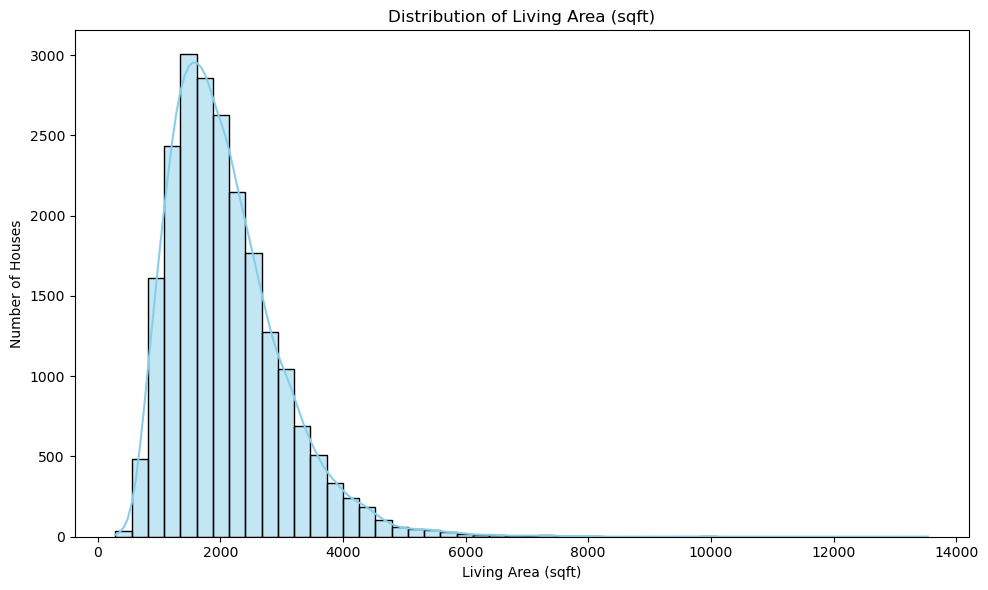

The distribution of living area (measured in square feet) among houses sold in King County during 2014–2015 is right-skewed, with most properties clustering between 1,000 and 2,500 sqft. The kernel density curve indicates a smooth peak around 2,000 sqft, suggesting this was the most common living space among sold houses. However, a number of extreme outliers extend beyond 10,000 sqft, representing unusually large luxury properties. This skewness highlights the heterogeneity of the housing market and suggests that while the dataset contains very large houses, the majority of transactions involve mid-sized homes.


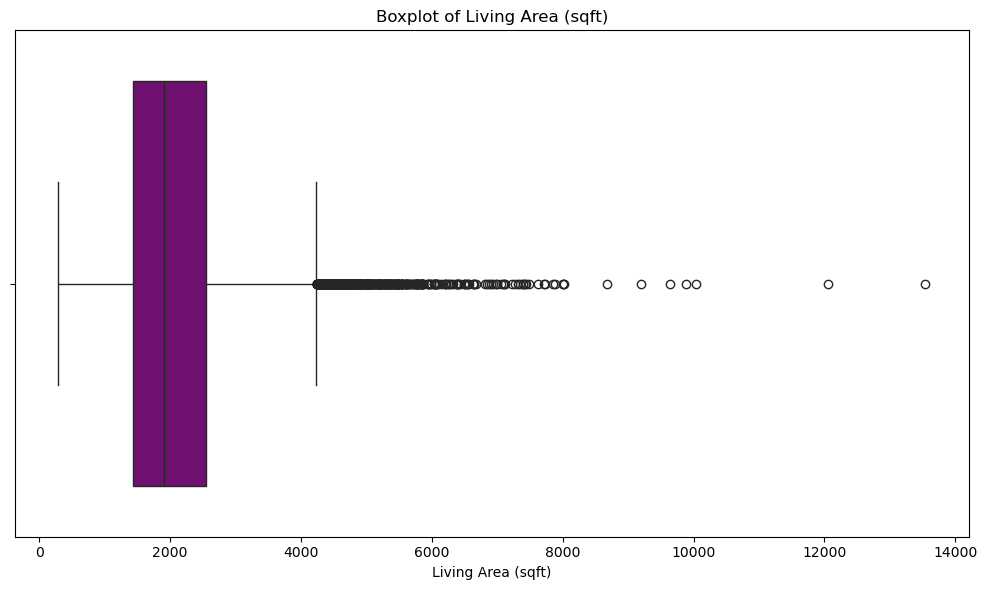

The boxplot of living surface further emphasizes the presence of substantial outliers. The interquartile range lies approximately between 1,400 and 2,500 sqft, confirming that most houses sold fall within this range. Nevertheless, the boxplot shows numerous points far beyond the upper whisker, with extreme cases exceeding 10,000 sqft. This underlines that while the dataset includes a few very large luxury homes, the typical transaction involves medium-sized properties.


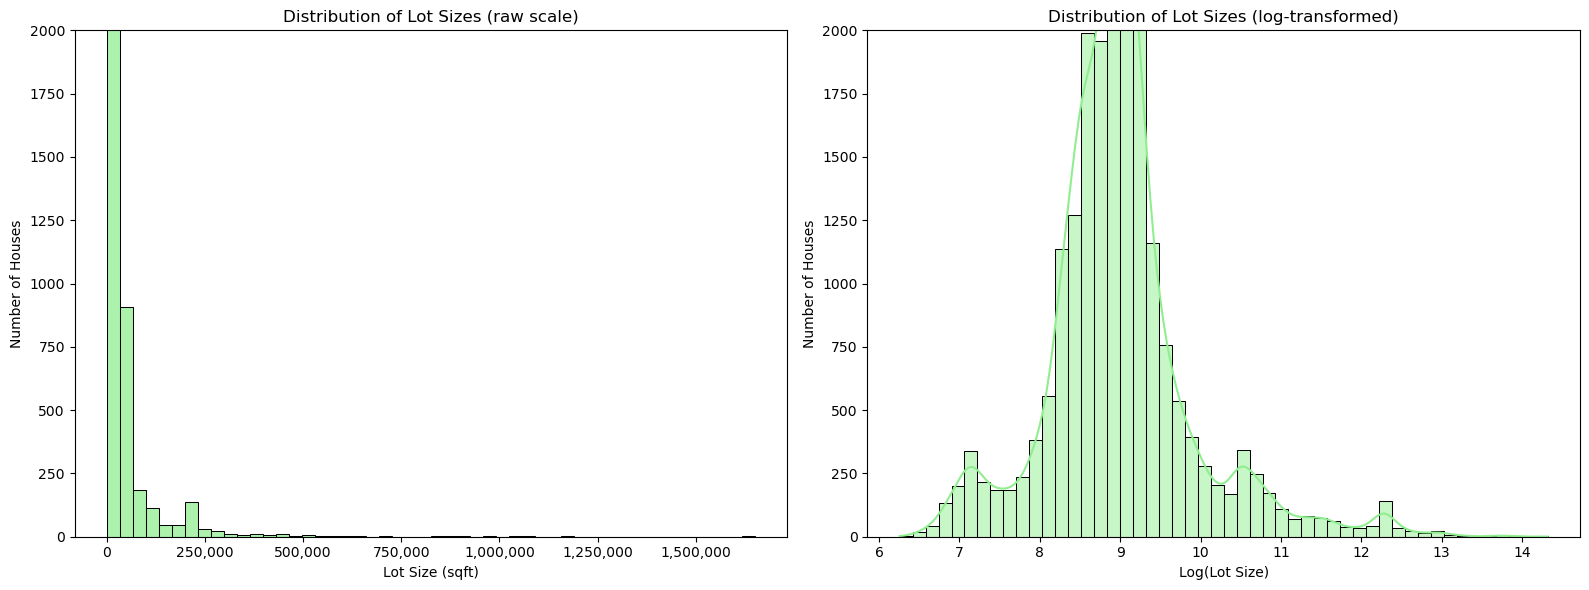

The comparison between the raw and log-transformed distributions of lot size among houses sold in King County between 2014 and 2015 underscores the importance of scale choice when analyzing highly skewed housing data. On the raw scale, the histogram is dominated by extreme outliers: while most houses occupy modest parcels of less than 15,000 square feet, a small number of properties extend to several hundred thousand or even over one million square feet. These extreme values compress the bulk of the observations into a narrow left-hand cluster, making it difficult to distinguish meaningful variation among typical suburban lots. In contrast, the logarithmic transformation rescaled the data in a way that reduces the disproportionate influence of outliers while expanding the resolution of the central range. This produces a smoother and more interpretable distribution, clearly showing that the majority of houses are concentrated within a relatively narrow band of lot sizes (roughly 5,000–1

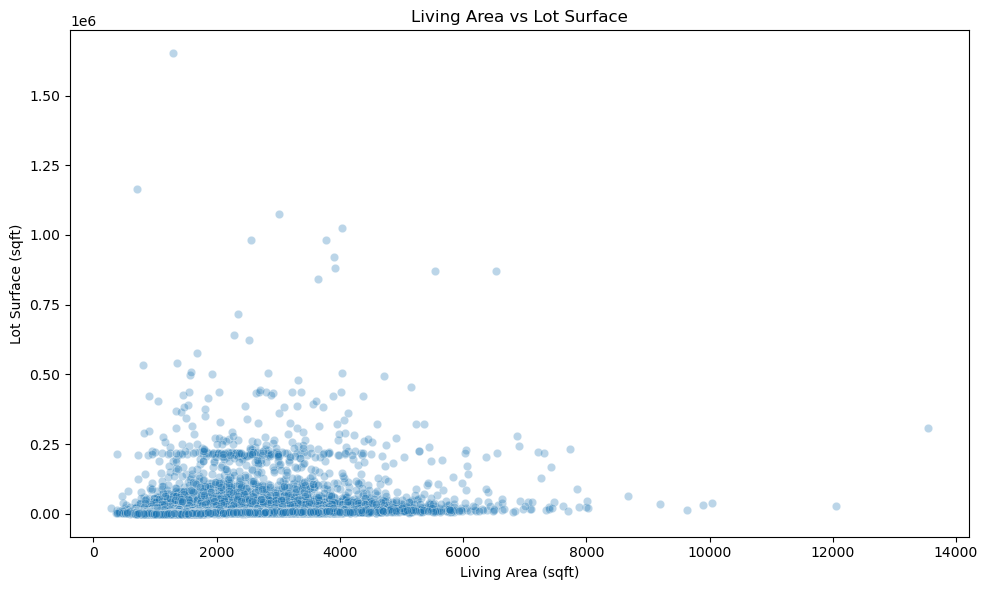

The comparison between living area and lot surface shows no strong linear relationship. While most properties cluster in the lower ranges of both variables, the scatterplot reveals that houses with similar living areas can be built on lots of vastly different sizes. A number of extreme outliers (very large lots with small houses) stand out, likely corresponding to rural or undeveloped parcels. This dispersion indicates that lot size is a highly variable characteristic and does not consistently scale with living space among sold homes.


In [13]:
# Surface distribution; to explore the surface-related variables in the dataset (sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15).
#df.info() 
min_sqft_living = df['sqft_living'].min()
max_sqft_living = df['sqft_living'].max()
mean_sqft_living = df['sqft_living'].mean()
min_sqft_lot = df['sqft_lot'].min()
max_sqft_lot = df['sqft_lot'].max()
mean_sqft_lot = df['sqft_lot'].mean()
print(f"All houses in this dataset have a surface area between {min_sqft_living} m² and {max_sqft_living} m² and are on average {mean_sqft_living} m². Furthermore, the houses have a ground coveraage contained between {min_sqft_lot} m² and {max_sqft_lot} m², with an average of {mean_sqft_lot} m².")

## Histogram of Living Area (sqft), helps to see distribution and detect skewness or outliers.
plt.figure(figsize=(10,6))
sns.histplot(df['sqft_living'],
             bins=50,
             kde=True,
             color='skyblue')
plt.title("Distribution of Living Area (sqft)")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Number of Houses")
plt.tight_layout()
#plt.savefig("living_area__distribution.png", dpi=300, bbox_inches='tight') # Save the figure
plt.show() # Show the plot
print("""The distribution of living area (measured in square feet) among houses sold in King County during 2014–2015 is right-skewed, with most properties clustering between 1,000 and 2,500 sqft. The kernel density curve indicates a smooth peak around 2,000 sqft, suggesting this was the most common living space among sold houses. However, a number of extreme outliers extend beyond 10,000 sqft, representing unusually large luxury properties. This skewness highlights the heterogeneity of the housing market and suggests that while the dataset contains very large houses, the majority of transactions involve mid-sized homes.""")

## Boxplot of living surface, in order to spot outliers and the central range.
plt.figure(figsize=(10,6))
sns.boxplot(x=df['sqft_living'],
            color='purple')
plt.title("Boxplot of Living Area (sqft)")
plt.xlabel("Living Area (sqft)")
plt.tight_layout()
#plt.savefig("living_area__boxplot.png", dpi=300, bbox_inches='tight') # Save the figure
plt.show() # Show the plot
print("""The boxplot of living surface further emphasizes the presence of substantial outliers. The interquartile range lies approximately between 1,400 and 2,500 sqft, confirming that most houses sold fall within this range. Nevertheless, the boxplot shows numerous points far beyond the upper whisker, with extreme cases exceeding 10,000 sqft. This underlines that while the dataset includes a few very large luxury homes, the typical transaction involves medium-sized properties.""")

## Histograms of Lot Surface
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Create a figure with two subplots side by side
sns.histplot(df['sqft_lot'],
    bins=50,
    kde=False,
    color='lightgreen',
    ax=axes[0]) # Raw lot sizes (highly skewed)
axes[0].set_ylim(0, 2000)  # limit y-axis for readability
axes[0].xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # format axis with commas
axes[0].set_title("Distribution of Lot Sizes (raw scale)")
axes[0].set_xlabel("Lot Size (sqft)")
axes[0].set_ylabel("Number of Houses")
sns.histplot(np.log1p(df['sqft_lot']),  # log1p avoids issues with 0 values
    bins=50,
    kde=True,
    color='lightgreen',
    ax=axes[1]) # Log-transformed lot sizes (reduces skew)
axes[1].set_ylim(0, 2000)  # limit y-axis for comparability
axes[1].set_title("Distribution of Lot Sizes (log-transformed)")
axes[1].set_xlabel("Log(Lot Size)")
axes[1].set_ylabel("Number of Houses")
plt.tight_layout()
#plt.savefig("lot_size__double_panel.png", dpi=300, bbox_inches='tight') # Save the figure
plt.show() # Show the plot
print("""The comparison between the raw and log-transformed distributions of lot size among houses sold in King County between 2014 and 2015 underscores the importance of scale choice when analyzing highly skewed housing data. On the raw scale, the histogram is dominated by extreme outliers: while most houses occupy modest parcels of less than 15,000 square feet, a small number of properties extend to several hundred thousand or even over one million square feet. These extreme values compress the bulk of the observations into a narrow left-hand cluster, making it difficult to distinguish meaningful variation among typical suburban lots. In contrast, the logarithmic transformation rescaled the data in a way that reduces the disproportionate influence of outliers while expanding the resolution of the central range. This produces a smoother and more interpretable distribution, clearly showing that the majority of houses are concentrated within a relatively narrow band of lot sizes (roughly 5,000–10,000 sqft). Thus, while the raw scale provides a faithful representation of absolute magnitudes, the log scale enhances comparability and reveals the underlying structure of the dataset. Together, these views illustrate both the prevalence of extreme heterogeneity in land parcels and the analytical utility of logarithmic transformations in real estate data.""")

## Comparison of surfaces (living vs Lot)
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, 
    x='sqft_living', 
    y='sqft_lot', 
    alpha=0.3)
plt.title("Living Area vs Lot Surface")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Lot Surface (sqft)")
plt.tight_layout()
plt.show() # Show the plot
print("""The comparison between living area and lot surface shows no strong linear relationship. While most properties cluster in the lower ranges of both variables, the scatterplot reveals that houses with similar living areas can be built on lots of vastly different sizes. A number of extreme outliers (very large lots with small houses) stand out, likely corresponding to rural or undeveloped parcels. This dispersion indicates that lot size is a highly variable characteristic and does not consistently scale with living space among sold homes.""")

All houses in this dataset were built between 1900 and 2015.


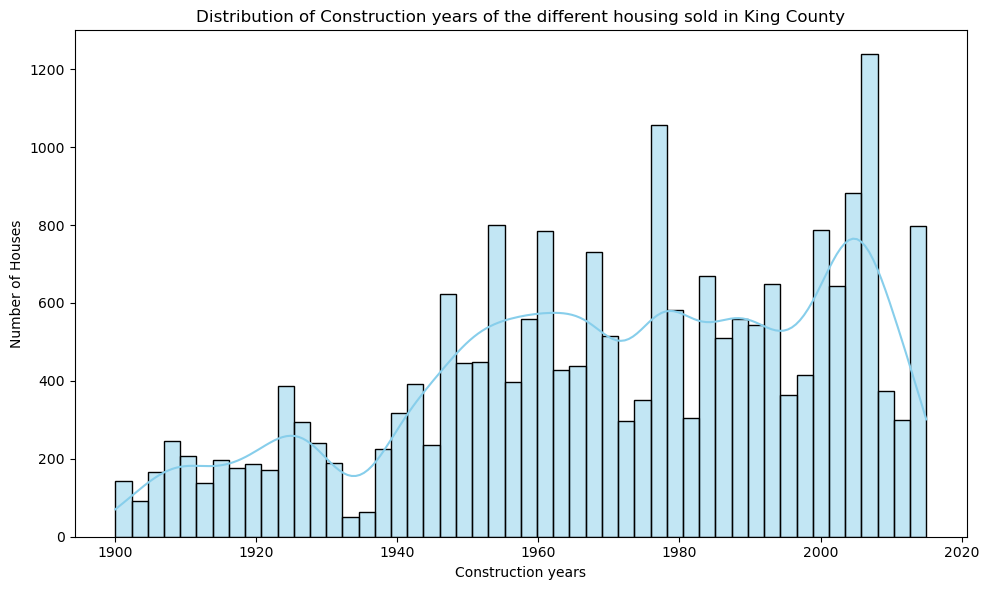

The histogram displays the distribution of construction years for houses sold in King County, with bars representing the raw counts and the blue line indicating a Kernel Density Estimate (KDE). While the histogram shows discrete fluctuations in construction activity across years, the KDE provides a smoothed trend that highlights the broader temporal patterns. The density curve confirms the relatively low prevalence of older houses (pre-1940), followed by a marked increase in construction during the mid-20th century, peaking around the 1970s. A secondary rise is visible in the early 2000s, reflecting more recent urban development. The decline toward the right end of the curve is not necessarily indicative of reduced construction but rather reflects the dataset’s temporal limitation (2014–2015), which naturally underrepresents the newest homes. Thus, the KDE serves as a useful complement to the histogram, as it emphasizes long-term construction trends while smoothing out year-to-year flu

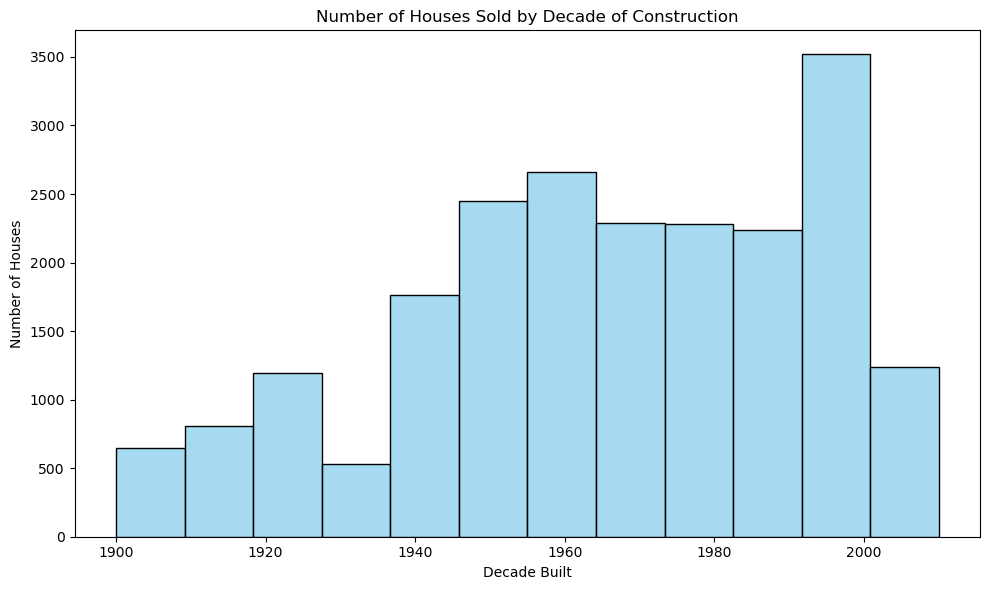

The histogram of houses sold per decade in the dataset illustrates the distribution of construction periods among the transactions recorded. The plot suggests that relatively few of the houses sold were originally built before the 1940s, with sales increasing for properties constructed in the mid-20th century and peaking for homes from the 1970s. Another elevated level of sales appears for homes built in the early 2000s. The apparent decline for the 2010s is largely explained by the temporal scope of the dataset (2014–2015), which captures only a subset of more recently built properties. It is important to note that this distribution does not accurately represent overall construction activity, as it is subject to market dynamics and dataset-specific sampling biases. Instead, it highlights which types of houses (by construction decade) were more likely to be sold during the observation period.


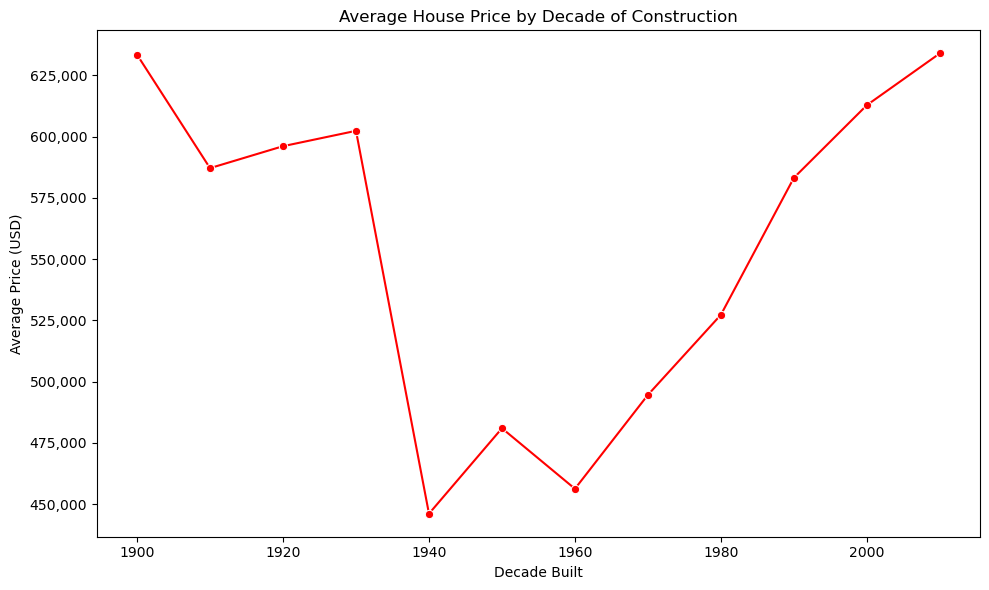

The histogram of houses sold per decade in the dataset illustrates the distribution of construction periods among the transactions recorded. The plot suggests that relatively few of the houses sold were originally built before the 1940s, with sales increasing for properties constructed in the mid-20th century and peaking for homes from the 1970s. Another elevated level of sales appears for homes built in the early 2000s. The apparent decline for the 2010s is largely explained by the temporal scope of the dataset (2014–2015), which captures only a subset of more recently built properties. It is important to note that this distribution does not accurately represent overall construction activity, as it is subject to market dynamics and dataset-specific sampling biases. Instead, it highlights which types of houses (by construction decade) were more likely to be sold during the observation period.


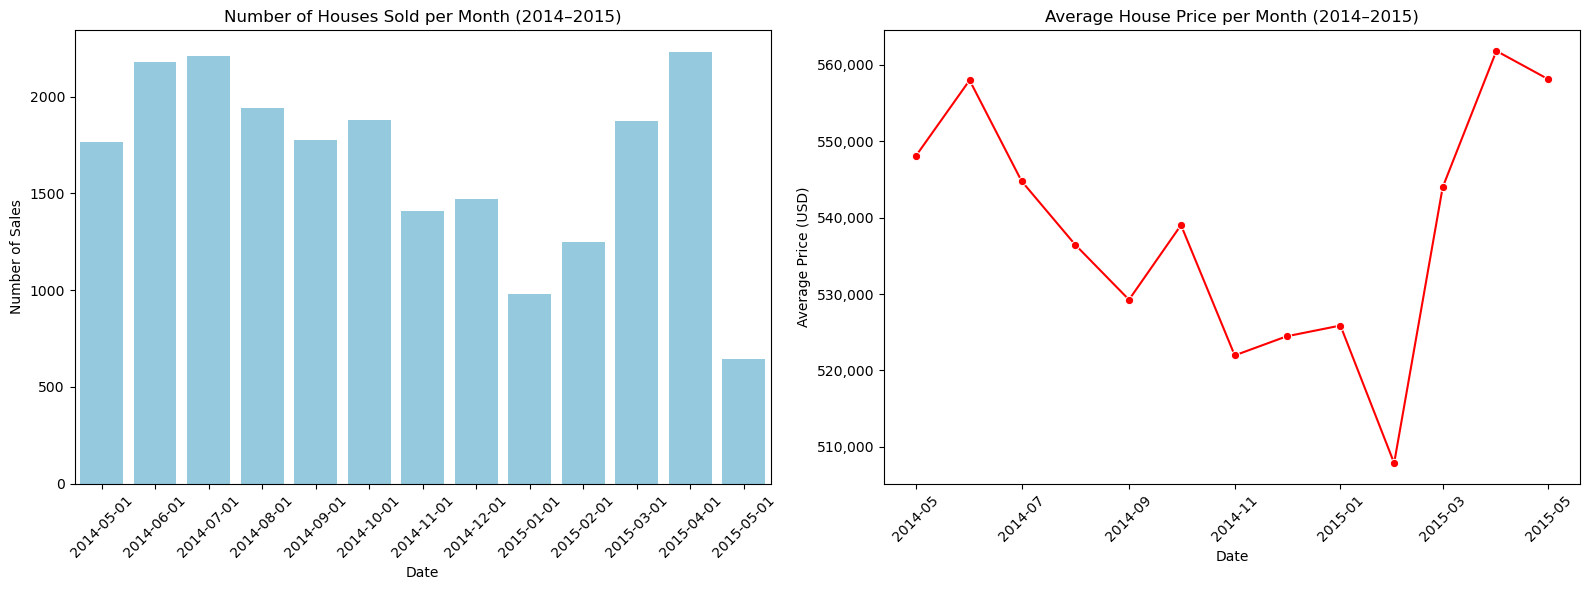

The two plots together illustrate the temporal dynamics of the King County housing market during the 2014–2015 observation period. The left panel shows the monthly distribution of transactions: the number of sales follows a clear seasonal cycle, with peaks in late spring and summer months (particularly May through July), followed by a decline toward the winter season. This seasonal pattern is consistent with broader housing market dynamics in the United States, where warmer months typically see greater activity due to more favorable moving conditions and family relocations aligned with the school year.
The right panel presents the monthly average sale price over the same period. Prices also show moderate temporal variation, with a general upward trend during mid-2014 and relative stabilization through 2015. Although the monthly averages fluctuate, they remain consistently higher during the peak sales months, suggesting that increased demand may exert upward pressure on prices. However,

In [16]:
# Temporal visualization
## Year of Construction of houses of the dataset
min_year = df['yr_built'].min() # Find the earliest construction year in the dataset
max_year = df['yr_built'].max() # Find the most recent construction year in the dataset
print(f"All houses in this dataset were built between {min_year} and {max_year}.")
plt.figure(figsize=(10, 6))
sns.histplot(df['yr_built'],
             bins=50,
             kde=True,
             color='skyblue') # Create a histogram of construction years
plt.title("Distribution of Construction years of the different housing sold in King County")
plt.xlabel("Construction years")
plt.ylabel("Number of Houses")
plt.tight_layout()
plt.show() # Show the plot
print("""The histogram displays the distribution of construction years for houses sold in King County, with bars representing the raw counts and the blue line indicating a Kernel Density Estimate (KDE). While the histogram shows discrete fluctuations in construction activity across years, the KDE provides a smoothed trend that highlights the broader temporal patterns. The density curve confirms the relatively low prevalence of older houses (pre-1940), followed by a marked increase in construction during the mid-20th century, peaking around the 1970s. A secondary rise is visible in the early 2000s, reflecting more recent urban development. The decline toward the right end of the curve is not necessarily indicative of reduced construction but rather reflects the dataset’s temporal limitation (2014–2015), which naturally underrepresents the newest homes. Thus, the KDE serves as a useful complement to the histogram, as it emphasizes long-term construction trends while smoothing out year-to-year fluctuations.""")

## Houses Built by Decade
# We floor-divide the year by 10, then multiply by 10 (e.g., 1974 → 1970)
df['decade_built'] = (df['yr_built'] // 10) * 10 # Create a new column for the decade of construction
plt.figure(figsize=(10,6))
sns.histplot(df['decade_built'],
             bins=len(df['decade_built'].unique()),
             color='skyblue')
plt.title("Number of Houses Sold by Decade of Construction")
plt.xlabel("Decade Built")
plt.ylabel("Number of Houses")
plt.tight_layout()
#plt.savefig("houses_sold_decade.png", dpi=300, bbox_inches='tight') # Save the figure
plt.show() # Show the plot
print("""The histogram of houses sold per decade in the dataset illustrates the distribution of construction periods among the transactions recorded. The plot suggests that relatively few of the houses sold were originally built before the 1940s, with sales increasing for properties constructed in the mid-20th century and peaking for homes from the 1970s. Another elevated level of sales appears for homes built in the early 2000s. The apparent decline for the 2010s is largely explained by the temporal scope of the dataset (2014–2015), which captures only a subset of more recently built properties. It is important to note that this distribution does not accurately represent overall construction activity, as it is subject to market dynamics and dataset-specific sampling biases. Instead, it highlights which types of houses (by construction decade) were more likely to be sold during the observation period.""")

## Average price by decade of construction
avg_price_by_decade = df.groupby('decade_built')['price'].mean()
#decade_counts = df['decade_built'].value_counts().sort_index() # Count the number of houses built per decade
plt.figure(figsize=(10,6))
sns.lineplot(x=avg_price_by_decade.index,
             y=avg_price_by_decade.values,
             marker="o",
             color='red')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("Average House Price by Decade of Construction")
plt.xlabel("Decade Built")
plt.ylabel("Average Price (USD)")
plt.tight_layout()
plt.show() # Show the plot
print("""The histogram of houses sold per decade in the dataset illustrates the distribution of construction periods among the transactions recorded. The plot suggests that relatively few of the houses sold were originally built before the 1940s, with sales increasing for properties constructed in the mid-20th century and peaking for homes from the 1970s. Another elevated level of sales appears for homes built in the early 2000s. The apparent decline for the 2010s is largely explained by the temporal scope of the dataset (2014–2015), which captures only a subset of more recently built properties. It is important to note that this distribution does not accurately represent overall construction activity, as it is subject to market dynamics and dataset-specific sampling biases. Instead, it highlights which types of houses (by construction decade) were more likely to be sold during the observation period.""")

## Temporal patterns: month sold vs price
sales_per_month = df.groupby(['year_sold', 'month_sold']).size().reset_index(name='count') # Group data by year and month, counting number of sales
sales_per_month['date'] = pd.to_datetime(
    sales_per_month['year_sold'].astype(str) + '-' + 
    sales_per_month['month_sold'].astype(str) + '-01') # Create a datetime column for easier plotting
avg_price_per_month = df.groupby(['year_sold', 'month_sold'])['price'].mean().reset_index() # Group data by year and month to compute average sale price
avg_price_per_month['date'] = pd.to_datetime(
    avg_price_per_month['year_sold'].astype(str) + '-' + 
    avg_price_per_month['month_sold'].astype(str) + '-01') # Create the same datetime column for plotting
fig, ax = plt.subplots(1, 2, figsize=(16,6)) # Create the figure with two subplots side by side
sns.barplot(data=sales_per_month,
    x='date', 
    y='count',
    color='skyblue',
    ax=ax[0]) # Plot 1: Number of sales per month 
ax[0].set_title("Number of Houses Sold per Month (2014–2015)")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Number of Sales")
ax[0].tick_params(axis='x', rotation=45)  # rotate x-axis labels for readability
sns.lineplot(data=avg_price_per_month,
    x='date',
    y='price',
    marker='o',
    color='red',
    ax=ax[1]) # Plot 2: Average price per month
ax[1].yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # format prices nicely
ax[1].set_title("Average House Price per Month (2014–2015)")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Average Price (USD)")
ax[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
#plt.savefig("double_plot_monthly_prices.png", dpi=300, bbox_inches='tight') # Save the figure
plt.show() # Show the plot
print("""The two plots together illustrate the temporal dynamics of the King County housing market during the 2014–2015 observation period. The left panel shows the monthly distribution of transactions: the number of sales follows a clear seasonal cycle, with peaks in late spring and summer months (particularly May through July), followed by a decline toward the winter season. This seasonal pattern is consistent with broader housing market dynamics in the United States, where warmer months typically see greater activity due to more favorable moving conditions and family relocations aligned with the school year.
The right panel presents the monthly average sale price over the same period. Prices also show moderate temporal variation, with a general upward trend during mid-2014 and relative stabilization through 2015. Although the monthly averages fluctuate, they remain consistently higher during the peak sales months, suggesting that increased demand may exert upward pressure on prices. However, the presence of high-value outliers in some months should be noted, as they may disproportionately influence mean values.
Together, these plots highlight both seasonality in transaction volumes and moderate temporal fluctuations in average prices, providing insight into short-term market dynamics in King County.""")

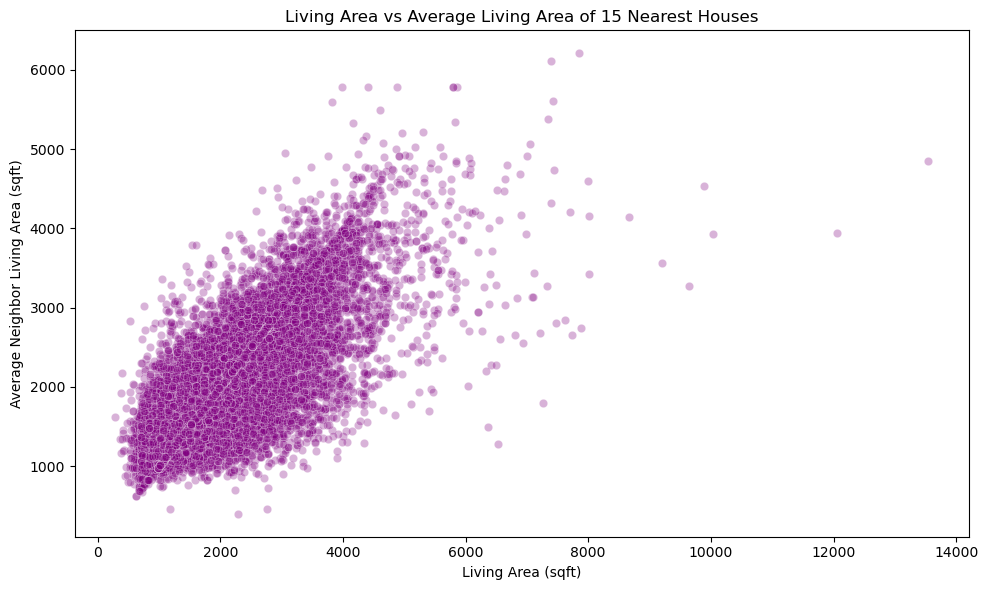

The scatterplot comparing living area with the average living area of the 15 nearest houses shows a strong positive association, as expected. Most points lie close to the diagonal, suggesting that houses tend to resemble their neighbors in size. However, deviations from the line reveal cases where individual homes are substantially larger or smaller than the local average, indicating local heterogeneity within neighborhoods. This feature is important for contextualizing a property relative to its surroundings, as being atypically large or small compared to neighbors could influence both its valuation and marketability.


In [11]:
## Neighborhood context (living area vs neighbors)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, 
    x='sqft_living', 
    y='sqft_living15', 
    alpha=0.3,
    color='purple')
plt.title("Living Area vs Average Living Area of 15 Nearest Houses")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Average Neighbor Living Area (sqft)")
plt.tight_layout()
plt.show() # Show the plot
print("""The scatterplot comparing living area with the average living area of the 15 nearest houses shows a strong positive association, as expected. Most points lie close to the diagonal, suggesting that houses tend to resemble their neighbors in size. However, deviations from the line reveal cases where individual homes are substantially larger or smaller than the local average, indicating local heterogeneity within neighborhoods. This feature is important for contextualizing a property relative to its surroundings, as being atypically large or small compared to neighbors could influence both its valuation and marketability.""")

Heatmap saved as price_heatmap.html — see attachment.


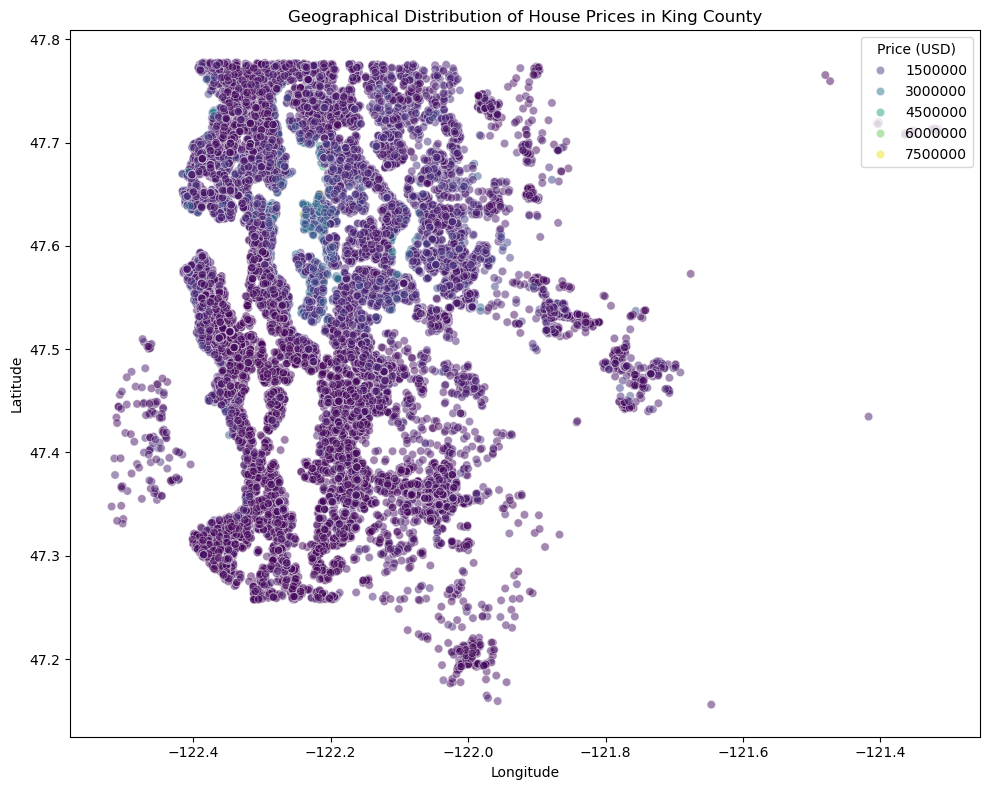

In [12]:
#Now we would like to explore how the area would influence the price of the housing. It seems to us senseful to try a chloropeth map.
df_sample = df.sample(2000, random_state=1)
m = folium.Map(location=[df['lat'].mean(), df['long'].mean()],
               zoom_start=10,
               tiles='cartodbpositron') # Create a base map centered roughly in the dataset's area
heat_data = [[row['lat'], row['long'], row['price']] for index, row in df_sample.iterrows()] # Prepare data for heatmap: [latitude, longitude, weight(price)]
HeatMap(heat_data,
        radius=10,         # Size of each point
        blur=15,           # Blurring for smoothness
        max_zoom=1).add_to(m) # Add heatmap layer
m.save("price_heatmap.html") # Save to HTML file so it can be opened in a browser
print("Heatmap saved as price_heatmap.html — see attachment.")

# Other version, without HTLM. 
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='long', y='lat', hue='price', palette='viridis', alpha=0.5)
plt.title("Geographical Distribution of House Prices in King County")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Price (USD)", loc='upper right')
plt.tight_layout()
plt.show() # Show the plot